In [2]:
import keras
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [3]:
#
# 1. Load Data
#
DATAFOLDER = '/home/d/Dropbox/CS410CatsAndDogz/'

In [4]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
X_train = train_generator.flow_from_directory(DATAFOLDER+'/train', 
                                              color_mode='grayscale', 
                                              target_size=(100,100))

Found 5998 images belonging to 2 classes.


In [5]:
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
X_test = test_generator.flow_from_directory(DATAFOLDER+'/test',
                                            color_mode='grayscale',
                                            target_size=(100,100))

Found 2998 images belonging to 2 classes.


In [16]:
first_image = X_train[0][0][0]
first_label = X_train[0][1][0]

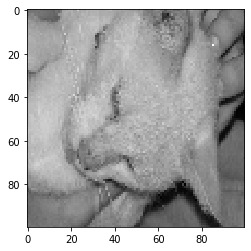

In [18]:
imshow(first_image[:,:,0], cmap='gray')

In [19]:
first_label

array([1., 0.], dtype=float32)

In [20]:
first_image.max()

0.94117653

In [21]:
first_image.shape

(100, 100, 1)

In [12]:
#
# 2. Setup Network
#

In [13]:
NUMBER_OF_CLASSES = 2

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                             activation='relu',
                             input_shape=first_image.shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(NUMBER_OF_CLASSES, activation='softmax'))

In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [14]:
#
# 3. Train Network
#

In [24]:
model.fit_generator(X_train, epochs=30, steps_per_epoch=32)

Epoch 1/30
32/32 [==============================] - 4s 140ms/step - loss: 0.8116 - accuracy: 0.5137
Epoch 2/30
32/32 [==============================] - 4s 116ms/step - loss: 0.6890 - accuracy: 0.5348
Epoch 3/30
32/32 [==============================] - 4s 110ms/step - loss: 0.6772 - accuracy: 0.6260
Epoch 4/30
32/32 [==============================] - 4s 114ms/step - loss: 0.6580 - accuracy: 0.6025
Epoch 5/30
32/32 [==============================] - 4s 116ms/step - loss: 0.6369 - accuracy: 0.6602
Epoch 6/30
32/32 [==============================] - 4s 117ms/step - loss: 0.6173 - accuracy: 0.6914
Epoch 7/30
32/32 [==============================] - 4s 119ms/step - loss: 0.5714 - accuracy: 0.7246
Epoch 8/30
32/32 [==============================] - 4s 114ms/step - loss: 0.5108 - accuracy: 0.7578
Epoch 9/30
32/32 [==============================] - 4s 119ms/step - loss: 0.4647 - accuracy: 0.7998
Epoch 10/30
32/32 [==============================] - 4s 116ms/step - loss: 0.4375 - accuracy: 0.8181

KeyboardInterrupt: 

In [16]:
#
# 4. Predict!
#

In [30]:
prediction = model.predict(X_test[0][0][10:11])

In [31]:
prediction

array([[0.03928649, 0.96071345]], dtype=float32)

In [32]:
np.argmax( prediction )

1

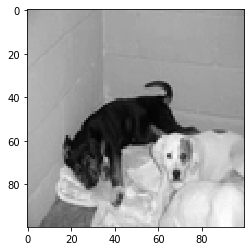

In [33]:
imshow(X_test[0][0][10,:,:,0], cmap='gray')

In [34]:
model.evaluate(X_test)

94/94 [==============================] - 11s 117ms/step


[0.7330230474472046, 0.6434289813041687]

In [35]:
model.metrics_names

['loss', 'accuracy']